# Лабораторная работа №3  
## Машинное обучение  
### Выполнил Тюмин Илья, студент ИВТИИбд-32

1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, test set). Использовать стандартные функции (train_test_split и др. нельзя).
2. С использованием библиотеки scikit-learn обучить модель линейной регрессии по обучающей выборке
3. Проверить точность модели по тестовой выборке
4. Построить модель с использованием полиномиальной функции. Построить графики зависимости точности на обучающей и тестовой выборке от степени полиномиальной функции.
5. Построить модель с использованием регуляризации. На основе экспериментов подобрать параметры для регуляризации. Построить графики зависимости точности модели на обучающей и тестовой выборках от коэффициента регуляризации.

In [1]:
# импорты будут здесь
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
# Код будет здесь
print(" Code be here ")

 Code be here 


1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, test set).

Для начала считаем данные из датасета в датафрейм df, попутно исключая столбцы с id телефона, пользователя и время, так как они не должны оказывать влияние на обучение модели.

In [3]:
df = pd.read_csv("trainingData.csv")
cdf = pd.read_csv("validationData.csv")
df = df.drop(columns=['USERID', 'PHONEID', 'TIMESTAMP'])
cdf = cdf.drop(columns=['USERID', 'PHONEID', 'TIMESTAMP'])

В примере, данном на лекции, под тестовую выборку выделяется 30% данных. Поступим так же: с помощью стандартной функции sample() из библиотеки pandas, которая возвращает случайную подвыборку строк, отбираем 70% строк датафрейма. Тогда в тестовую выборку test_df с помощью функции drop() заносим оставшиеся 30% строк исходного датафрейма.

Далее в качестве целевых переменных (переменная Y) будем использовать широту и долготу. А в качестве признаков (переменная X) - значения Wap-отпечатка, отн.позиции, этаж, и id здания и места.

In [4]:
train_df = df.sample(frac = 0.7, random_state = 42)
test_df = df.drop(train_df.index)

Y_train = train_df[["LONGITUDE", "LATITUDE"]]
X_train = train_df.drop(columns=["LONGITUDE", "LATITUDE"])

Y_test = test_df[["LONGITUDE", "LATITUDE"]]
X_test = test_df.drop(columns = ["LONGITUDE", "LATITUDE"])

2. С использованием библиотеки scikit-learn обучить модель линейной регрессии по обучающей выборке

Создаём объект model класса LinearRegression и применяем метод fit() для обучения модели.
Затем тестируем нашу модель на обучающей и тестовой выборке.  
h(x) = w_0 + w_1x  
w_new = w_old - aj(w_old)  

In [5]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

3. Проверить точность модели по тестовой выборке

Для проверки точности модели мы можем использовать две метрики:  
MSE (среднеквадратичное отклонение) - насколько в среднем предсказания отклоняются от реальных значений. Её удобно использовать для сравнения моделей по абсолютному отклонению от реальных значений в единицах переменной, однако эта метрика не подходит для оценки предсказаний в относительном смысле.  
R2 (коэф. детерминации) - показывает, какую долю дисперсии целевой переменной модель объясняет. Измеряется в долях единицы. Это нормированная метрика, которая позволяет понять, насколько хорошо модель работает, независимо от масштаба переменной y.  
Остановимся на использовании метрики R2. Для оценки модели по выбранной метрике будем использовать стандартную функцию r2_score.

In [6]:
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)
print(f"Train: {r2_train}, Test: {r2_test}")

Train: 0.9794790305168923, Test: 0.9776294538277095


Получаем удовлетворительные значения как для обучающей, так и для тестовой выборки. Модель обучена.

4. Построить модель с использованием полиномиальной функции. Построить графики зависимости точности на обучающей и тестовой выборке от степени полиномиальной функции.

Создаём pipeline - объект, который автоматизирует процесс трансформации признаков в полиномиальные. Он будет применять шаги poly_features и linear_regression по порядку. Иначе нам пришлось бы вручную использовать методы.
1. poly = PolynomialFeatures(degree=1, include_bias=False). Единица, так как большее число признаков не помещается удаётся обработать ввиду большого размера датасета.  
2. model = LinearRegression().
3. X_train_poly = poly.fit_transform(X_train) - обучение на X_train, считает новые степени и комбинации (| x1 | x2 | → | x1 | x2 | x1² | x1x2 | x2² | x1³ | x1²x2 | … |) и создание матрицы новых признаков.  
4. model.fit(X_train_poly, Y_train) - линейная регрессия занимается поиском коэффициентов w_i, как и в предыдущих пунктах, за тем лишь исключением, что признаки являются полиномиальными (учитываются более глубокие взаимосвязи между признаками).  
5. X_test_poly = poly.transform(X_test) - создание новых признаков для тестовой выборки обученной моделью.  

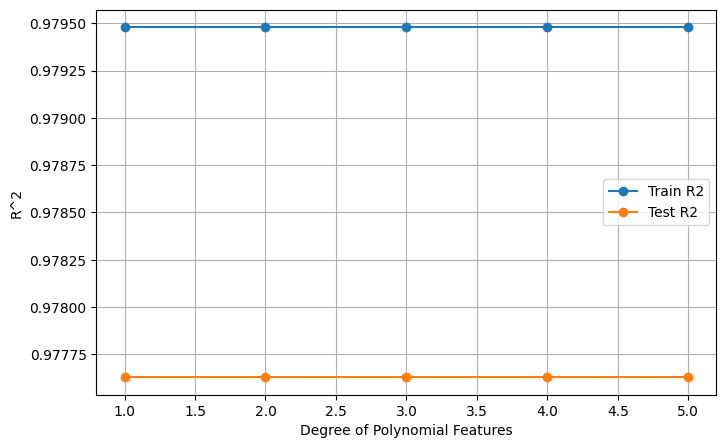

In [7]:
degrees = range(1,6)
r2_train_list = []
r2_test_list = []

for degree in degrees:
   pipeline = Pipeline([
       ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
       ("linear_regression", LinearRegression())
   ])
   pipeline.fit(X_train, Y_train)
   y_train_pred = pipeline.predict(X_train)
   y_test_pred = pipeline.predict(X_test)
   r2_train_list.append(r2_score(Y_train, y_train_pred))
   r2_test_list.append(r2_score(Y_test, y_test_pred))

plt.figure(figsize = (8,5))
plt.plot(degrees, r2_train_list, marker ='o', label = "Train R2")
plt.plot(degrees, r2_test_list, marker = 'o', label = "Test R2")
plt.xlabel("Degree of Polynomial Features")
plt.ylabel("R^2")
plt.legend()
plt.grid(True)
plt.show()

5. Построить модель с использованием регуляризации. На основе экспериментов подобрать параметры для регуляризации. Построить графики зависимости точности модели на обучающей и тестовой выборках от коэффициента регуляризации.

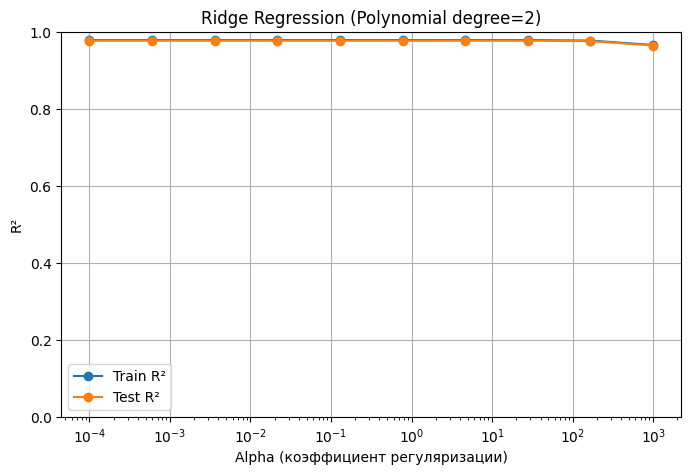

Наилучший alpha: 4.6416


In [9]:
alphas = np.logspace(-4, 3, 10)

r2_train_list = []
r2_test_list = []

for alpha in alphas:
    pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=alpha, max_iter=100000))
])
    pipeline.fit(X_train, Y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    r2_train_list.append(r2_score(Y_train, y_train_pred))
    r2_test_list.append(r2_score(Y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.semilogx(alphas, r2_train_list, marker='o', label="Train R²")
plt.semilogx(alphas, r2_test_list, marker='o', label="Test R²")
plt.xlabel("Alpha (коэффициент регуляризации)")
plt.ylabel("R²")
plt.title(f"Ridge Regression (Polynomial degree={2})")
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()

best_index = np.argmax(r2_test_list)
best_alpha = alphas[best_index]

print(f"Наилучший alpha: {best_alpha:.4f}")

Для борьбы с переобучением и коррелированными признаками применим регуляризацию Ridge (L2). Она добавляет штраф к сумме квадратов коэффициентов модели, что стабилизирует обучение и уменьшает влияние сильно коррелированных признаков.  
В качестве признаков используем полиномиальные признаки 2-й степени, как в предыдущем пункте (средняя точность и меньше затрат в вычислительной мощности). Обновим наш pipeline, который теперь выполняет следующие шаги:  
PolynomialFeatures(degree=2, include_bias=False) – создаёт новые признаки, учитывающие комбинации и степени всех признаков (WAP-отпечатка).  
StandardScaler() – нормализует признаки. Это важно, так как L2-регуляризация чувствительна к масштабу признаков.  
Ridge(alpha=α, max_iter=100000) – линейная регрессия с L2-регуляризацией. Параметр α контролирует силу штрафа: чем выше α, тем сильнее регуляризация и меньше риск переобучения.  
Для подбора оптимального значения α выбираем диапазон от 10⁻⁴ до 10³ в логарифмической шкале.На графике можно увидеть, при каком αlpha модель лучше всего балансирует между переобучением и недообучением. Оптимальное значение α соответствует максимальному R² на тестовой выборке.  